# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Edad,Retrasos
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Dibuja un diagrama de dispersión (scatter plot) para los datos.

Text(0.5, 1.0, 'Scatter Plot Retrasos vs. Edad')

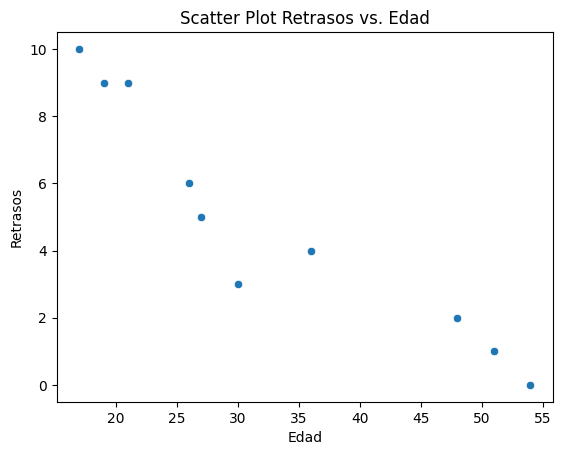

In [3]:
sns.scatterplot(data=student_data, x='Edad', y='Retrasos')
plt.title("Scatter Plot Retrasos vs. Edad")

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

*En el Scatter Plot podemos ver que a mayor edad, menor retrasos, es decir, están inversamente relacionadas. Tendencia lineal.*

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

*La covarianza mide cómo dos variables varían juntas, pero no está estandarizada, lo que dificulta la comparación en diferentes escenarios.*

*La correlación, por otro lado, estandariza esta medida, permitiendo la comparación entre diferentes pares de variables (entre -1 y 1).*

*Covarianza -> Valor negativo: Indica que las variables se mueven en direcciones opuestas.*

*Correlación -> Valor cercano a -1: Indica una relación lineal negativa fuerte. (entre -1 y 1)*

In [4]:
# Calcular la covarianza
cov = student_data.cov()
cov

,Edad,Retrasos
Edad,187.655556,-45.566667
Retrasos,-45.566667,12.544444


In [5]:
# Calcular la correlación
corr = student_data.corr()
corr

,Edad,Retrasos
Edad,1.000000,-0.939163
Retrasos,-0.939163,1.000000


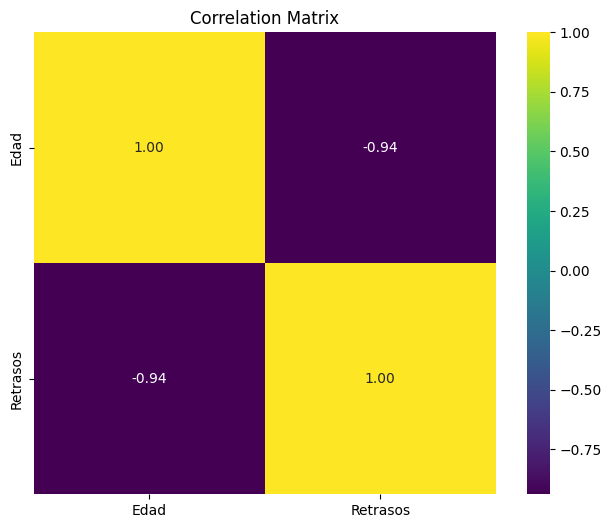

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt='.2f', square=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

*El target (y) es la variable "Retrasos", siendo X la variable predictora.*

*Usaremos Regresión Lineal simple*

In [7]:
seed = 22

In [8]:
X = student_data['Edad'].values.reshape(-1, 1)
y = student_data['Retrasos'].values

In [9]:
X

array([[17],
       [51],
       [27],
       [21],
       [36],
       [48],
       [19],
       [26],
       [54],
       [30]])

In [10]:
y

array([10,  1,  5,  9,  4,  2,  9,  6,  0,  3])

In [11]:
from sklearn.model_selection import train_test_split
# Your code goes here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8, 1) (2, 1) (8,) (2,)


In [12]:
X_train

array([[30],
       [19],
       [21],
       [26],
       [17],
       [54],
       [36],
       [48]])

In [13]:
y_train

array([ 3,  9,  9,  6, 10,  0,  4,  2])

In [14]:
X_test

array([[27],
       [51]])

In [15]:
y_test

array([5, 1])

### Linear Regression

In [16]:
## Ajusta una regresión lineal simple: **Retrasos vs Edad**
# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coeficient and intercept of the regression
print(lm.intercept_, lm.coef_)

13.36643410111823 [-0.25470706]


Grafica tu modelo de regresión en tu diagrama de dispersión.

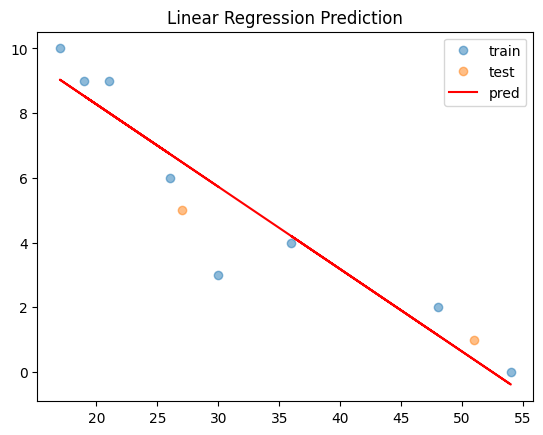

In [17]:
# Your code goes here
y_train_pred = lm.predict(X_train)

plt.plot(X_train, y_train, "o", alpha=.5, label='train')
plt.plot(X_test, y_test, "o", alpha=.5, label='test')
plt.plot(X_train, y_train_pred, "r", label='pred')
plt.title("Linear Regression Prediction")
plt.legend()

In [18]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# Make prediction
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_train_pred)}')
print(f'Test R^2 Score: {r2_score(y_test, y_test_pred)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_train_pred, y_train)}')
print(f'Test MSE: {mean_squared_error(y_test_pred, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_train_pred, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_test_pred, y_test)}')

Train R^2 Score: 0.884999117147268
Test R^2 Score: 0.674118338603988

Train MSE: 1.3782137054382109
Test MSE: 1.3035266455840484

Train RMSE: 1.1739734687965528
Test RMSE: 1.1417209140521376


### OLS

In [19]:
X_train_df = pd.DataFrame(X_train, columns=['Edad'])
X_test_df = pd.DataFrame(X_test, columns=['Edad'])
X_train_df

,Edad
0,30
1,19
2,21
3,26
4,17
5,54
6,36
7,48


In [20]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_df)
est = sm.OLS(y_train, X_train_sm) # Creates an object OLS estimator

est = est.fit()
est.summary()

c:\Users\emartin4\Videos\MIDA\venv-mida\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     46.17
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           0.000497
Time:                        19:20:17   Log-Likelihood:                -12.635
No. Observations:                   8   AIC:                             29.27
Df Residuals:                       6   BIC:                             29.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3664      1.270     10.525      0.000      10.259      16.474
Edad          -0.2547      0.037     -6.795      0.000      -0.346      -0.163
==============================================================================
Omnibus:                        8.402   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                2.801
Skew:                          -1.392   Prob(JB):                        0.246
Kurtosis:                       3.809   Cond. No.                         89.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Realizamos predicciones sobre los datos de prueba
y_train_pred = est.predict(X_train_sm)

X_test_sm = sm.add_constant(X_test_df)
y_pred = est.predict(X_test_sm)

# Evaluamos la performance del modelo con RMSE y R^2
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_train_pred)}')
print(f'Test R^2 Score: {r2_score(y_test, y_test_pred)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_train_pred, y_train)}')
print(f'Test MSE: {mean_squared_error(y_test_pred, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_train_pred, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_test_pred, y_test)}')

Train R^2 Score: 0.8849991171472679
Test R^2 Score: 0.674118338603988

Train MSE: 1.378213705438211
Test MSE: 1.3035266455840484

Train RMSE: 1.1739734687965528
Test RMSE: 1.1417209140521376


### Conclusión

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

*Podemos concluir que la edad es un buen predictor de la tardanza, el coeficiente que toma la edad para predecir la tardanza con el regresor lineal es: -0.2547, como ya habíamos intuido al principio, es negativo, es decir la covarianza y correlación son negativas.*

*Si observamos el R^2 score, el cual tiene un máximo valor de 1, en este caso nos da 0.885, por lo que el resultado es bueno.*

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [22]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")
vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

### ⭐ Con 5 variables predictoras ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']

In [23]:
vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [24]:
vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year',  'CO2 Emission Grams/Mile']]

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


In [25]:
# Your code goes here
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']].values
y = vehicles['CO2 Emission Grams/Mile'].values

In [26]:
X

array([[1984.        ,    4.        ,   19.38882353,   17.        ,
        1950.        ],
       [1984.        ,    6.        ,   25.35461538,   13.        ,
        2550.        ],
       [1985.        ,    4.        ,   20.600625  ,   16.        ,
        2100.        ],
       ...,
       [2015.        ,    3.        ,    9.15583333,   36.        ,
        1100.        ],
       [2016.        ,    3.        ,    9.15583333,   36.        ,
        1100.        ],
       [2016.        ,    3.        ,    9.41742857,   35.        ,
        1150.        ]])

In [27]:
y

array([522.76470588, 683.61538462, 555.4375    , ..., 244.        ,
       246.        , 255.        ])

In [28]:
# Your code goes here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(28761, 5) (7191, 5) (28761,) (7191,)


In [29]:
X_train_df = pd.DataFrame(X_train, columns=['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year'])
X_test_df = pd.DataFrame(X_test, columns=['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year'])
X_train_df

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
0,1992.0,8.0,21.232500,18.0,2000.0
1,2002.0,6.0,16.480500,20.0,2000.0
2,1992.0,8.0,23.543571,14.0,2400.0
3,1993.0,6.0,19.388824,17.0,1950.0
4,1991.0,8.0,19.109250,20.0,1800.0
...,...,...,...,...,...
28756,2008.0,12.0,32.961000,10.0,4050.0
28757,1994.0,6.0,16.480500,20.0,2000.0
28758,2002.0,6.0,16.480500,20.0,1650.0
28759,1987.0,4.0,14.330870,23.0,1450.0


#### OLS

In [30]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_df)
est = sm.OLS(y_train, X_train_sm) # Creates an object OLS estimator

est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 2.999e+05
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:20:18   Log-Likelihood:            -1.2118e+05
No. Observations:               28761   AIC:                         2.424e+05
Df Residuals:                   28755   BIC:                         2.424e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               770.1411     21.535     35.763      0.000     727.932     812.350
Year                 -0.3213      0.011    -29.832      0.000      -0.342      -0.300
Cylinders             1.8927      0.092     20.520      0.000       1.712       2.073
Fuel Barrels/Year    19.1391      0.068    282.304      0.000      19.006      19.272
Combined MPG         -3.0117      0.047    -64.028      0.000      -3.104      -2.919
Fuel Cost/Year        0.0318      0.001     59.362      0.000       0.031       0.033
==============================================================================
Omnibus:                    56507.643   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        188576719.777
Skew:                          15.689   Prob(JB):                         0.00
Kurtosis:                     398.444   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

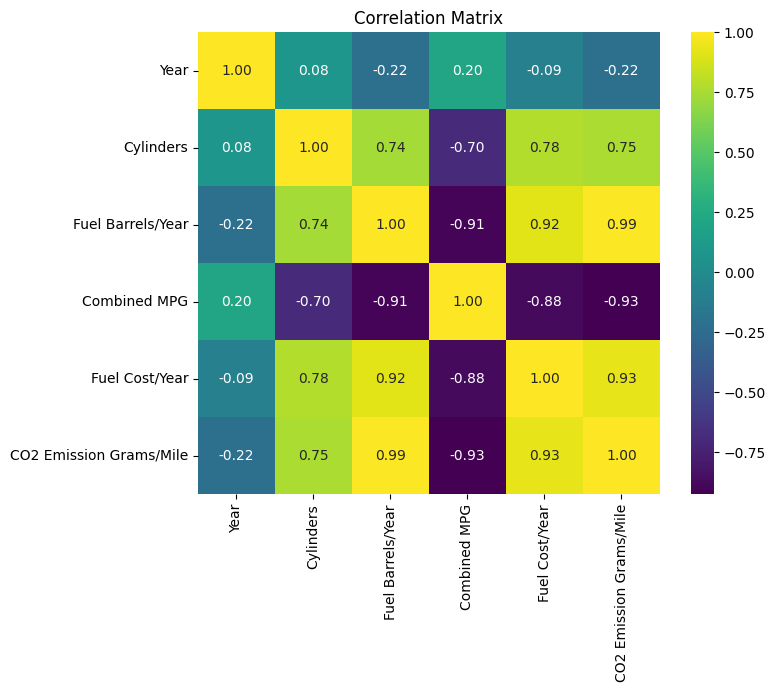

In [31]:
# Matriz de correlación para ver las relaciones entre variables
correlation_matrix = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', square=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

#### Evaluación

In [32]:
# Realizamos predicciones sobre los datos de prueba
y_train_pred = est.predict(X_train_sm)

X_test_sm = sm.add_constant(X_test_df)
y_test_pred = est.predict(X_test_sm)

# Evaluamos la performance del modelo con RMSE y R^2
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_train_pred)}')
print(f'Test R^2 Score: {r2_score(y_test, y_test_pred)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_train_pred, y_train)}')
print(f'Test MSE: {mean_squared_error(y_test_pred, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_train_pred, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_test_pred, y_test)}')

Train R^2 Score: 0.9811851603597175
Test R^2 Score: 0.9796038344806184

Train MSE: 267.34042916252514
Test MSE: 286.32514983125697

Train RMSE: 16.350548283238858
Test RMSE: 16.921145050830837


Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

*Regresión Lineal Múltiple*

Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

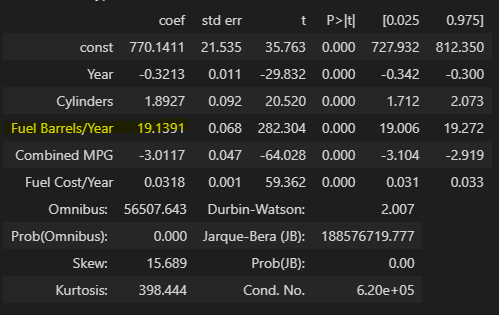

*Como está altamente correlado el C02 con El Fuel Barrels/Year, la vamos a quitar en la siguiente prueba "Con 4 variables predictoras", ya que al ser 0.99 en la Corr Matrix puede estar sobreajustando al modelo*

#### Conclusión
¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

*Una de las más importantes es **Fuels Barrels/Year**, ya que vemos en la tabla de resultados del OLS Estimator que toma un valor de **19.1391**, es decir, es una de las que más afecta a la predicción del C02. Vemos en la matriz de correlación que está altamente correlada con el C02 (target), en un 0.99, por ello una buena práctica es eliminar esta variable de la predicción, por ello se ha añadido un nuevo apartado: "(Extra) Con 4 variables predictoras ['Year', 'Cylinders', 'Combined MPG', 'Fuel Cost/Year']*

*Una de las menos importantes es **Fuels Cost/Year**, ya que vemos en la tabla de resultados del OLS Estimator que toma un valor de **0.0318**, es decir, es una de las que menos afecta a la predicción del C02.*

### (Extra) Con 4 variables predictoras ['Year', 'Cylinders', 'Combined MPG', 'Fuel Cost/Year']

*Como está altamente correlado el C02 con El Fuel Barrels/Year, la vamos a quitar, ya que al ser 0.99 puede estar sobreajustando al modelo*

In [33]:
vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [34]:
vehicles[['Year', 'Cylinders', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

,Year,Cylinders,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,17,1950,522.764706
1,1984,6.0,13,2550,683.615385
2,1985,4.0,16,2100,555.437500
3,1985,6.0,13,2550,683.615385
4,1987,6.0,16,2550,555.437500
...,...,...,...,...,...
35947,2013,3.0,36,1100,244.000000
35948,2014,3.0,36,1100,243.000000
35949,2015,3.0,36,1100,244.000000
35950,2016,3.0,36,1100,246.000000


In [35]:
# Your code goes here
X = vehicles[['Year', 'Cylinders', 'Combined MPG', 'Fuel Cost/Year']].values
y = vehicles['CO2 Emission Grams/Mile'].values

In [36]:
X

array([[1984.,    4.,   17., 1950.],
       [1984.,    6.,   13., 2550.],
       [1985.,    4.,   16., 2100.],
       ...,
       [2015.,    3.,   36., 1100.],
       [2016.,    3.,   36., 1100.],
       [2016.,    3.,   35., 1150.]])

In [37]:
y

array([522.76470588, 683.61538462, 555.4375    , ..., 244.        ,
       246.        , 255.        ])

In [38]:
# Your code goes here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(28761, 4) (7191, 4) (28761,) (7191,)


In [39]:
X_train_df = pd.DataFrame(X_train, columns=['Year', 'Cylinders', 'Combined MPG', 'Fuel Cost/Year'])
X_test_df = pd.DataFrame(X_test, columns=['Year', 'Cylinders', 'Combined MPG', 'Fuel Cost/Year'])
X_train_df

,Year,Cylinders,Combined MPG,Fuel Cost/Year
0,1992.0,8.0,18.0,2000.0
1,2002.0,6.0,20.0,2000.0
2,1992.0,8.0,14.0,2400.0
3,1993.0,6.0,17.0,1950.0
4,1991.0,8.0,20.0,1800.0
...,...,...,...,...
28756,2008.0,12.0,10.0,4050.0
28757,1994.0,6.0,20.0,2000.0
28758,2002.0,6.0,20.0,1650.0
28759,1987.0,4.0,23.0,1450.0


#### OLS

In [40]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_df)
est = sm.OLS(y_train, X_train_sm) # Creates an object OLS estimator

est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 9.412e+04
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:20:18   Log-Likelihood:            -1.4027e+05
No. Observations:               28761   AIC:                         2.805e+05
Df Residuals:                   28756   BIC:                         2.806e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2793.0371     39.438     70.821      0.000    2715.737    2870.337
Year              -1.1884      0.020    -59.274      0.000      -1.228      -1.149
Cylinders          6.1702      0.177     34.922      0.000       5.824       6.517
Combined MPG      -9.6677      0.079   -122.310      0.000      -9.823      -9.513
Fuel Cost/Year     0.1147      0.001    131.861      0.000       0.113       0.116
==============================================================================
Omnibus:                     4164.867   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16095.751
Skew:                           0.691   Prob(JB):                         0.00
Kurtosis:                       6.394   Cond. No.                     5.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

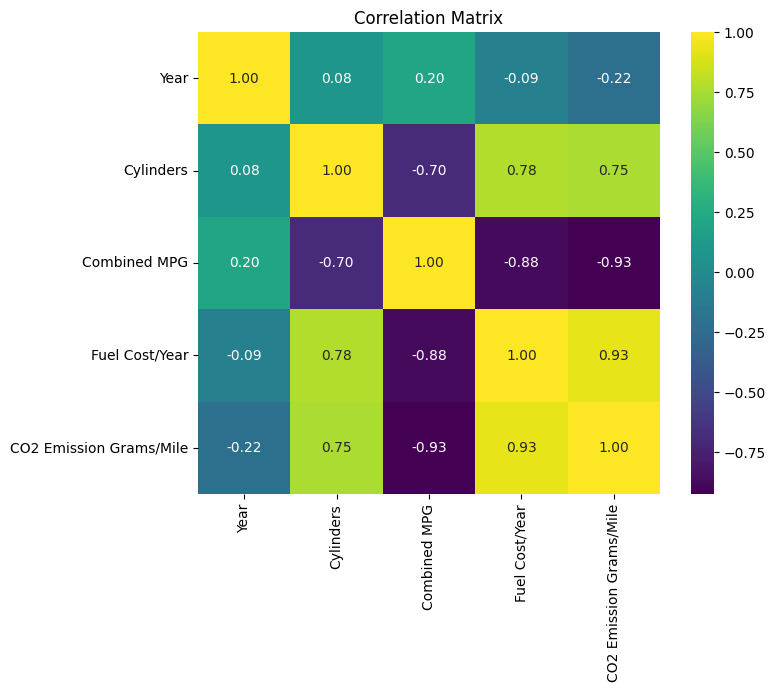

In [41]:
# Matriz de correlación para ver las relaciones entre variables
correlation_matrix = vehicles[['Year', 'Cylinders', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', square=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

#### Evaluación

In [42]:
# Realizamos predicciones sobre los datos de prueba
y_train_pred = est.predict(X_train_sm)

X_test_sm = sm.add_constant(X_test_df)
y_test_pred = est.predict(X_test_sm)

# Evaluamos la performance del modelo con RMSE y R^2
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_train_pred)}')
print(f'Test R^2 Score: {r2_score(y_test, y_test_pred)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_train_pred, y_train)}')
print(f'Test MSE: {mean_squared_error(y_test_pred, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_train_pred, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_test_pred, y_test)}')

Train R^2 Score: 0.929038996055433
Test R^2 Score: 0.9298895586522126

Train MSE: 1008.2863107548299
Test MSE: 984.2233631887809

Train RMSE: 31.75352438320556
Test RMSE: 31.372334359890736


## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [43]:
party_data = pd.DataFrame({'Invitados': [1, 3, 4, 6, 8, 9, 11, 14],'Asistentes': [1, 2, 4, 4, 5, 7, 8, 13]})
party_data

,Invitados,Asistentes
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


#### Sin quitar Outlier

Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

Text(0.5, 1.0, 'Scatter Plot Invitados vs. Asistentes')

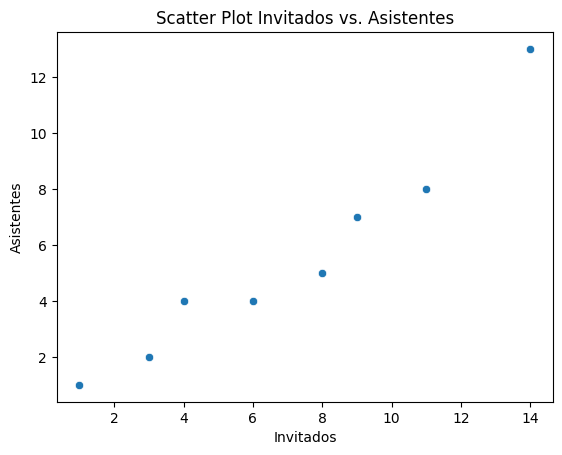

In [44]:
sns.scatterplot(data=party_data, x='Invitados', y='Asistentes')
plt.title("Scatter Plot Invitados vs. Asistentes")

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

*Tiene una tendencia lineal creciente, podemos entrenar un Regresor lineal*

In [45]:
seed = 22
X = party_data['Invitados'].values.reshape(-1, 1)
y = party_data['Asistentes'].values

from sklearn.model_selection import train_test_split
# Your code goes here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6, 1) (2, 1) (6,) (2,)


In [46]:
X_train_df = pd.DataFrame(X_train, columns=['Invitados'])
X_test_df = pd.DataFrame(X_test, columns=['Invitados'])
X_train_df

,Invitados
0,4
1,14
2,1
3,11
4,8
5,9


In [47]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_df)
est = sm.OLS(y_train, X_train_sm) # Creates an object OLS estimator

est = est.fit()
est.summary()

c:\Users\emartin4\Videos\MIDA\venv-mida\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     47.99
Date:                Thu, 31 Oct 2024   Prob (F-statistic):            0.00228
Time:                        19:20:19   Log-Likelihood:                -8.7129
No. Observations:                   6   AIC:                             21.43
Df Residuals:                       4   BIC:                             21.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1925      1.075     -0.179      0.867      -3.176       2.791
Invitados      0.8331      0.120      6.927      0.002       0.499       1.167
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.811
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.425
Skew:                           0.019   Prob(JB):                        0.809
Kurtosis:                       1.697   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Realizamos predicciones sobre los datos de prueba
y_train_pred = est.predict(X_train_sm)

X_test_sm = sm.add_constant(X_test_df)
y_test_pred = est.predict(X_test_sm)

# Evaluamos la performance del modelo con RMSE y R^2
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_train_pred)}')
print(f'Test R^2 Score: {r2_score(y_test, y_test_pred)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_train_pred, y_train)}')
print(f'Test MSE: {mean_squared_error(y_test_pred, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_train_pred, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_test_pred, y_test)}')

Train R^2 Score: 0.9230556390977444
Test R^2 Score: 0.6281169088133887

Train MSE: 1.0686716791979947
Test MSE: 0.37188309118661134

Train RMSE: 1.0337657757915932
Test RMSE: 0.6098221799726633


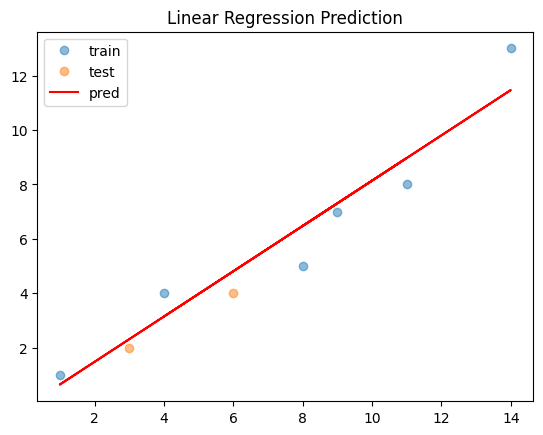

In [49]:
# Your code goes here
plt.plot(X_train, y_train, "o", alpha=.5, label='train')
plt.plot(X_test, y_test, "o", alpha=.5, label='test')
plt.plot(X_train, y_train_pred, "r", label='pred')
plt.title("Linear Regression Prediction")
plt.legend()

#### Quitando Outlier

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

*Eliminamos el último punto ya que parece ser un valor atípico o outlier*

In [50]:
## Eliminamos el último punto ya que parece ser un valor atípico o outlier
party_data = party_data.drop(index=7) # Outlier en el index 7 del Dataframe
party_data

,Invitados,Asistentes
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


In [51]:
seed = 22
X = party_data['Invitados'].values.reshape(-1, 1)
y = party_data['Asistentes'].values

from sklearn.model_selection import train_test_split
# Your code goes here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5, 1) (2, 1) (5,) (2,)


In [52]:
X_train_df = pd.DataFrame(X_train, columns=['Invitados'])
X_test_df = pd.DataFrame(X_test, columns=['Invitados'])
X_train_df

,Invitados
0,6
1,1
2,11
3,8
4,9


In [53]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_df)
est = sm.OLS(y_train, X_train_sm) # Creates an object OLS estimator

est = est.fit()
est.summary()

c:\Users\emartin4\Videos\MIDA\venv-mida\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     85.47
Date:                Thu, 31 Oct 2024   Prob (F-statistic):            0.00268
Time:                        19:20:19   Log-Likelihood:                -3.1138
No. Observations:                   5   AIC:                             10.23
Df Residuals:                       3   BIC:                             9.447
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0517      0.595      0.087      0.936      -1.843       1.946
Invitados      0.7069      0.076      9.245      0.003       0.464       0.950
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.689
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.382
Skew:                          -0.344   Prob(JB):                        0.826
Kurtosis:                       1.833   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Realizamos predicciones sobre los datos de prueba
y_train_pred = est.predict(X_train_sm)

X_test_sm = sm.add_constant(X_test_df)
y_test_pred = est.predict(X_test_sm)

# Evaluamos la performance del modelo con RMSE y R^2
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# Compute Score
print(f'Train R^2 Score: {r2_score(y_train, y_train_pred)}')
print(f'Test R^2 Score: {r2_score(y_test, y_test_pred)}\n')

# Compute MSE for training and testing sets 
print(f'Train MSE: {mean_squared_error(y_train_pred, y_train)}')
print(f'Test MSE: {mean_squared_error(y_test_pred, y_test)}\n')

# Compute RMSE for training and testing sets 
print(f'Train RMSE: {root_mean_squared_error(y_train_pred, y_train)}')
print(f'Test RMSE: {root_mean_squared_error(y_test_pred, y_test)}')

Train R^2 Score: 0.9660919540229885
Test R^2 Score: 0.3571640903686081

Train MSE: 0.20344827586206887
Test MSE: 0.6428359096313919

Train RMSE: 0.4510524092187834
Test RMSE: 0.8017704843852709


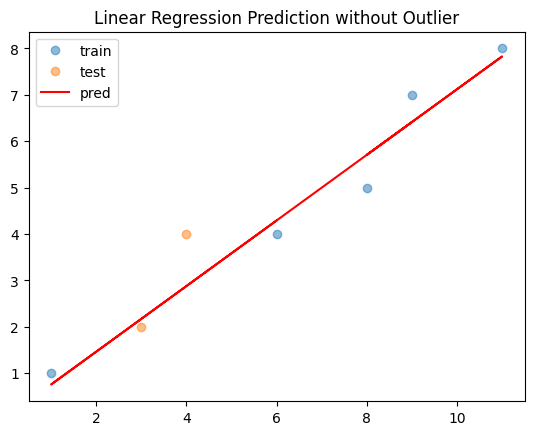

In [55]:
# Your code goes here
plt.plot(X_train, y_train, "o", alpha=.5, label='train')
plt.plot(X_test, y_test, "o", alpha=.5, label='test')
plt.plot(X_train, y_train_pred, "r", label='pred')
plt.title("Linear Regression Prediction without Outlier")
plt.legend()

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

*Vemos que el R^2 mejora al haber quitado el outlier consiguiendo un Train R^2 Score: 0.9660 vs. Train R^2 Score: 0.9231. Vemos que la curva se adapta mejor a los datos en el gráfico sin Outlier.*

> Sin Outlier:

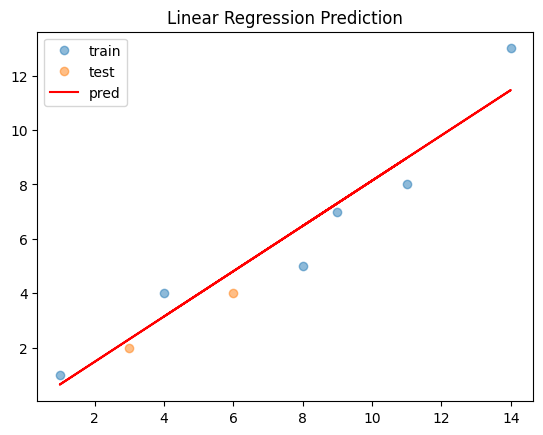 

> Con Outlier:

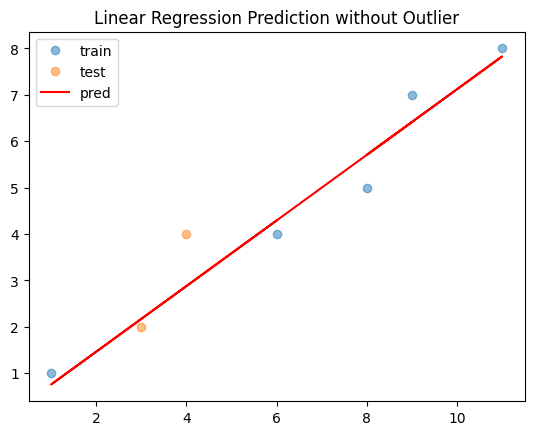